<h1 style="color:Maroon; text-align:center">Projet : Prediction du poids de patient</h1>




In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd

<h1 style="color:Maroon;">1. Dataset presentation</h1>

> Le present dataset contient les indices corporels des individus , patients et non patients d'une des province de la RDC. avant netoyage de données, le dataset était très sale avec beaucoup des données manquantes sur certaines collones qu'on a juger non informatifs. J'ai extrais 7 variables informatives necessaire pour construire un model predictif à partir d'un echantillion de 1744 individus observés. données extraite depuis 2017.

<h3 style="color:Maroon;">Description des varibles:</h3>

>- Age: l'age de l'idividu
- sexe: sexe de l'ividu
- taille_CM: taille de l'individu en centimettre 
- Taille_M: taille de l'individu en mettre
- BodyMasseIdex_MI: l'idice de masse corporel 
- poids_KG: le poids réel de l'individu en KG
- Contour: le contour abdominal du patient

>NB: le BodyMasseIdex_MI , pour indice de masse corporel est obtenu pour le cas general par la fomule: <span style="color:red"> $\frac{poids(kg)}{taille(m^2)}$ </span>, selon wikipedia: L'Organisation mondiale de la santé (OMS) a défini en 1997 cet indice de masse corporelle comme le standard pour évaluer les risques liés au surpoids chez l’adulte. Elle a également défini des intervalles standards (maigreur, indice normal, surpoids, obésité) en se basant sur la relation constatée statistiquement entre l'IMC et le taux de mortalité. 
Dans notre model predictif nous n'allons pas tenir compte de ça, car pour l'obtenir il faut le poids et la taille, tendisque le poids est notre cible. ce qui fait que la presence pour la construction du modele n'a pas d'importance.



><h4>Importation de données</h4>

In [3]:
# Nous importons  les données dans un ficher excel  en precisant la feuille contenant les données déja traitées
data=pd.read_excel('taillepoidsetc.xls','Donnees_traités')

In [4]:
# Verifions la dimmension de notre dataset
data.shape

(1744, 7)

>Parmis les informations importantes à savoir sur un jeu de données pendant la preparation à l'analyse, ce verifier la presence ou non des valeurs manquantes
car s'il y a presence de données manquantes, le model ne sera pas corect.

In [5]:
# Verifions les valeurs manquantes si elles existes  
data.isnull().sum()

age                   0
sexe                  0
poids_KG              0
taille_CM             0
Taille_M              0
BodyMasseIndex_BMI    0
contour               1
dtype: int64

In [6]:
# on remarque une donnée manquante sur la collone contour, veillons la supprimer.
data=data.dropna()

><h4 style='color:red'>Remarque:</h4> 
Pour resoudre le probleme de données manquante, il y a plusieurs paramettres qu'il faut tenir compte.

1. Pour supprimeer les données  manquantes on doit necessairement tenir conte de la quantité d'informations qu'on veux supprimier. S'il ya plusieurs données manquantes dans une collone, ex 70% de l'echantillon, il sera question de se dire est ce que la variable en question est très informative pour notre projet? si oui on peut ramplacer les valeurs manquantes par la moyennes de données existante, si non on supprime carement la collone. on peut aussi ramplacer les données manquantes par plusieurs techniques qui existent.

2. Si comme dans notre cas la quantité des données manquantes est très faible ex: 1 à 5 % de l'echantillon alors on peut carement supprimer les lignes de données manques. Pour nous, on avait 1744 après suppression d'une ligne on reste avec 1743 lignes de données. fantastique 

In [7]:
data.isnull().sum()

age                   0
sexe                  0
poids_KG              0
taille_CM             0
Taille_M              0
BodyMasseIndex_BMI    0
contour               0
dtype: int64

In [8]:
# voici nouvellement les données qu'on a appres suppression d'une ligne
data.shape

(1743, 7)

<h2 style="color:maroon">2. Un peut de statistique </h2>

>On peut observer le tableau synthetique sur les mesures statistique (mesures de tendance centrale et mesures de dispersion ) pour tirer de connaissance sur notre jeu de donné 

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1743.0,51.617326,16.370140,20.000000,39.00000,52.000000,65.000000,97.000000
sexe,1743.0,1.641997,0.479551,1.000000,1.00000,2.000000,2.000000,2.000000
poids_KG,1743.0,54.663282,12.657443,30.000000,46.00000,52.000000,61.000000,115.000000
taille_CM,1743.0,158.529776,8.422134,133.000000,153.00000,158.000000,164.000000,188.000000
Taille_M,1743.0,1.585298,0.084221,1.330000,1.53000,1.580000,1.640000,1.880000
BodyMasseIndex_BMI,1743.0,21.708241,4.560237,12.129337,18.62842,20.661157,23.634033,49.126404
contour,1743.0,79.139530,12.701390,57.000000,70.00000,76.000000,85.000000,205.000000


In [10]:
# definir les futures et target respectivement  X et Y
x=data[['age','sexe','taille_CM','Taille_M','contour']]
y=data[['poids_KG']]

In [11]:
x.head(3)

,age,sexe,taille_CM,Taille_M,contour
0,20,2,161.0,1.61,77.0
1,49,2,153.0,1.53,76.0
2,60,1,159.0,1.59,62.0


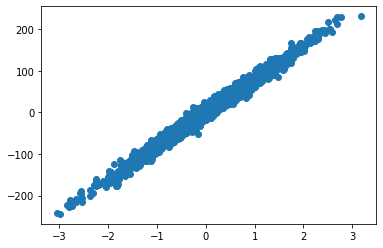

In [12]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x,y = make_regression(n_samples=1700, n_features=1, noise=10)
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée

In [13]:
# redimensionnement de  y 
y = y.reshape(y.shape[0], 1)
print(y.shape)

(1700, 1)


In [14]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(1700, 2)


In [15]:
# on definit le vecteur parametre theta initialisé de maniere àleatoire   
#  signalons que theta prend a et b , rappelons nous du fameux aX+b=Y
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

In [16]:
# on crée un model 
def model(X, theta):
    return X.dot(theta)

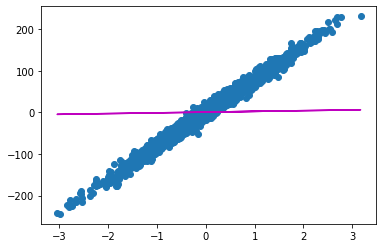

In [28]:

# visualisation  du resultat
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='m')


# la fonction coût ou erreur

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

In [31]:
def cout(X, y, theta):
    c = len(y)
    return 1/(2*c) * np.sum((model(X, theta) - y)**2)

In [32]:
cout(X, y, theta)

2980.2349447924316

calcul du graduant 

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

faire de la descente du gradient

$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$


In [33]:
# calcul du gradient
def g(X, y, theta):
    c = len(y)
    return 1/c * X.T.dot(model(X, theta) - y)

In [46]:
# la descente du gradient
def gd(X, y, theta, learning_rate, epoch):
    
    cost_history = np.zeros(epoch) # evaluation du coût
    
    for i in range(0, epoch):
        theta = theta - learning_rate * g(X, y, theta) # mise a jour du parametre theta
        cost_history[i] = cout(X, y, theta) 
        
    return theta, cost_history

In [47]:
# entrenaiment du model
epoch = 1000 #iterations
learning_rate = 0.01 
theta_final, cost_history = gd(X, y, theta, learning_rate, epoch)

In [48]:
theta_final # les bons paramettres retenus 

array([[79.87902243],
       [-0.17643196]])

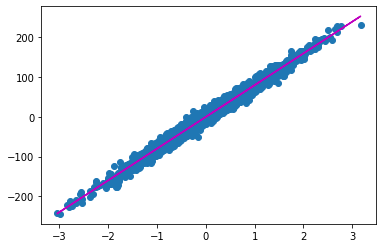

In [39]:
#Affichage de resultat
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='m')

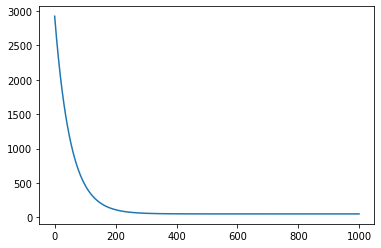

In [49]:
#observons l'evolution de l'apprentissage en evaluant la fonction coût, on remarque la stabilité à partir de 250 Iterations 
plt.plot(range(epoch), cost_history)

In [51]:
# Evaluons la performance du model avec le coefficient de determination  ici
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [53]:
# on obtiens 98 pourcents de succès
coef_determination(y, predictions)

0.9843881798336543